In [3]:
import pandas as pd

co2_df = pd.read_csv('data.csv')

co2_df["gc02"] = co2_df["gc02"].astype('float')

co2_df.head()

,partij,gc02,cleaner_than,green_host,kleur
0,PVDA,0.58,66,True,#e40006
1,VVD,1.99,24,True,#ff6400
2,CDA,0.87,53,True,#2cc84d
3,D66,1.91,25,True,#00ae41
4,PVV,0.79,56,True,#012758


In [21]:
grote_partijen = ["VVD", "PVV", "CDA", "SP", "GroenLinks", "D66", "PVDA"]

groene_partijen = ["Volt", "Partij voor de Dieren", "Christen Unie", "SP", "GroenLinks", "D66", "PVDA"]

grote_partijen_df = co2_df[co2_df["partij"].isin(grote_partijen)]

groene_partijen_df = co2_df[co2_df["partij"].isin(groene_partijen)]

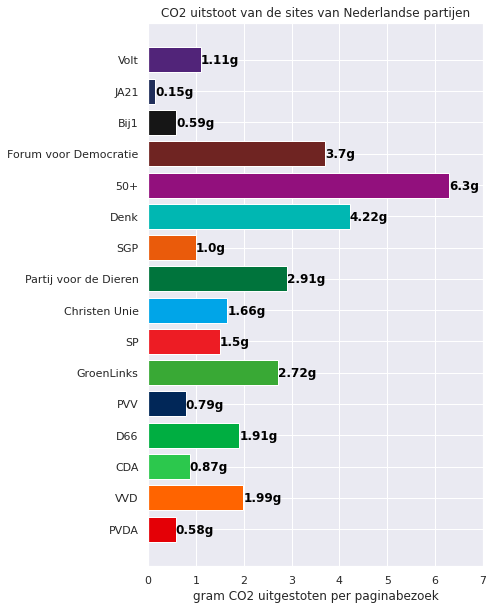

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

def plot_partijen(df, ylim = None, figsize=None, title = None, filename = None):
    
    if figsize is not None:
        plt.figure(figsize=figsize)
    
    ax = plt.gca()

    plt.barh(df["partij"], df["gc02"], color=df["kleur"])

    plt.xlim((0, ylim))
    
    plt.xlabel("gram CO2 uitgestoten per paginabezoek")
    
    if title is not None:
        plt.title(title)
        
        
    labels = df["gc02"]
    for i, v in enumerate(labels):
        ax.text(v, i-.13, str(v) + "g", color='black', fontweight='bold')
        
    if filename is not None:
        plt.savefig(f"{filename}.svg", bbox_inches="tight", transparent=True)
    
    plt.show()
    
plot_partijen(co2_df, figsize=(6, 10), ylim=7, title = "CO2 uitstoot van de sites van Nederlandse partijen", filename="all")

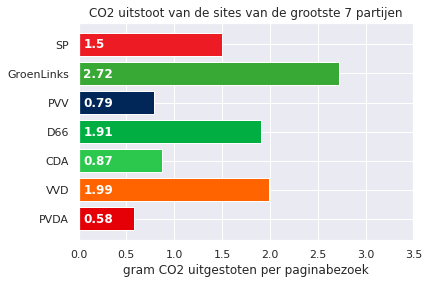

In [42]:
plot_partijen(grote_partijen_df, 3.5, title="CO2 uitstoot van de sites van de grootste 7 partijen")

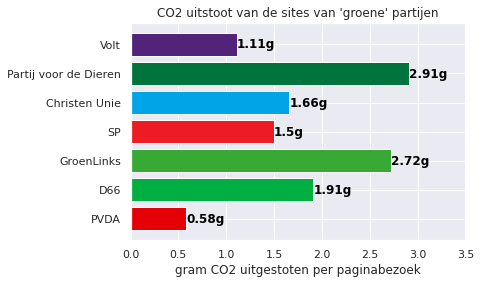

In [53]:
plot_partijen(groene_partijen_df, 3.5, title="CO2 uitstoot van de sites van 'groene' partijen", filename="groen")